In [1]:
import sys
sys.path.append("../../")
import helper
from pandas import read_excel,DataFrame,melt,merge,read_csv,pivot_table,pivot
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [9]:
origin=read_excel('공모전 및 프로젝트 엑셀파일/서울시 문화시설 현황 (한국어) 분석용.xlsx')
origin.head()

,순번,분류명,공간명(한글),개관년도,지역,주소
0,1,전시시설,[의외의 조합]_청년예술공간지원사업 선정공간,2016,중구,서울시 중구 동호로17길 121 (신당동)
1,2,전시시설,[17717]_청년예술공간지원사업 선정공간,2014,성북구,서울시 성북구 성북로8길 11 (성북동)
2,3,전시시설,[space55]_청년예술공간지원사업 선정공간,2017,은평구,서울시 은평구 증산로19길 9-3 (신사동)
3,4,공연장,[게토얼라이브]_청년예술공간지원사업 선정공간,2016,성동구,"서울시 성동구 왕십리로 104 (성수동1가, 영화빌딩)"
4,5,전시시설,[대안예술공간이포]_청년예술공간지원사업 선정공간,2008,영등포구,서울시 영등포구 도림로126길 9 (문래동3가)


In [10]:
origin.isna().sum()

순번          0
분류명         0
공간명(한글)     0
개관년도       26
지역          0
주소          0
dtype: int64

In [11]:
df=origin.copy()

In [12]:
df['분류명'].value_counts()

분류명
공연장         318
전시시설        164
도서관         101
복지관          94
청소년수련관       49
미술관          31
다문화_가족센터     26
지방문화원        25
박물관          18
문예회관          6
Name: count, dtype: int64

In [16]:
df['지역'] = df['지역'].str.replace(' ', '')

In [17]:
# '지역' 별로 갯수를 세기
count_by_region = df.groupby('지역').size().reset_index(name='갯수')
count_by_region

,지역,갯수
0,강남구,88
1,강동구,15
2,강북구,16
3,강서구,20
4,관악구,16
5,광진구,15
6,구로구,20
7,금천구,11
8,노원구,19
9,도봉구,21


In [ ]:
count_by_region=DataFrame()

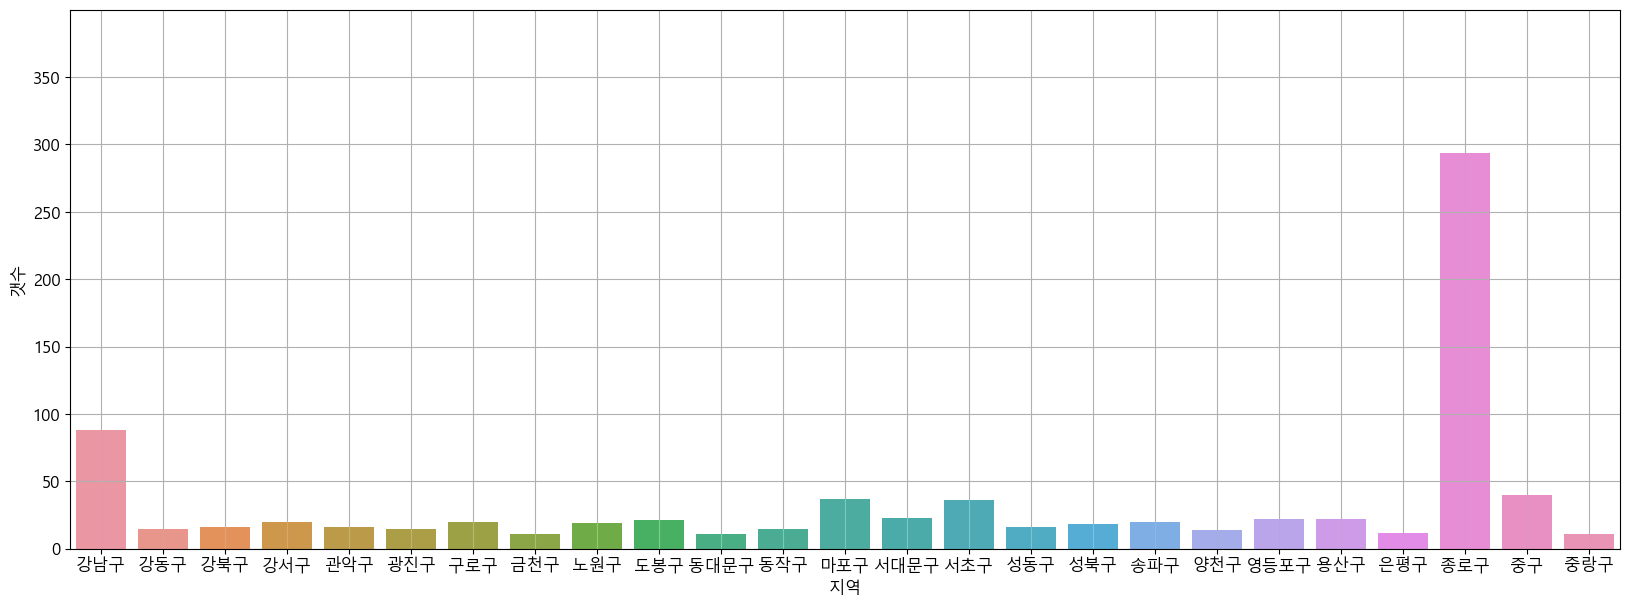

In [18]:
plt.figure(figsize=(20,7))
sb.barplot(data=count_by_region,x='지역',y='갯수')
plt.ylim(0,400)
plt.yticks(np.arange(0, 400, 50))  # y축 눈금 위치 설정 (50 간격)
plt.grid()
plt.show()
plt.close()

1차적으로 각 행정구별 문화시설을 정리해서 확인 결과 종로구가 압도적으로 많다. ~~~

In [19]:
df.head()

# 피봇테이블 생성
pivot_df = df.pivot_table(index='지역', columns='분류명', values='순번', aggfunc='count', fill_value=0)
pivot_df

분류명,공연장,다문화_가족센터,도서관,문예회관,미술관,박물관,복지관,전시시설,지방문화원,청소년수련관
지역,,,,,,,,,,
강남구,22,1,8,0,4,1,6,41,1,4
강동구,1,1,7,0,0,0,2,1,1,2
강북구,3,1,5,1,0,0,3,0,1,2
강서구,0,1,5,0,0,1,10,0,1,2
관악구,1,1,3,0,0,0,5,3,1,2
광진구,5,1,3,0,0,0,3,1,1,1
구로구,5,1,9,0,0,0,3,0,1,1
금천구,2,1,3,0,0,0,2,0,1,2
노원구,1,1,5,1,0,0,8,0,1,2


In [20]:
# 피봇테이블을 다시 멜트하여 재구성
melted_df = pivot_df.reset_index().melt(id_vars='지역', var_name='분류명', value_name='개수')
melted_df

,지역,분류명,개수
0,강남구,공연장,22
1,강동구,공연장,1
2,강북구,공연장,3
3,강서구,공연장,0
4,관악구,공연장,1
...,...,...,...
245,용산구,청소년수련관,2
246,은평구,청소년수련관,1
247,종로구,청소년수련관,0
248,중구,청소년수련관,3


In [21]:
melted_df1=melted_df.sort_values('지역',ascending=False)
melted_df1

,지역,분류명,개수
249,중랑구,청소년수련관,2
149,중랑구,박물관,0
224,중랑구,지방문화원,1
49,중랑구,다문화_가족센터,1
74,중랑구,도서관,2
...,...,...,...
100,강남구,미술관,4
75,강남구,문예회관,0
50,강남구,도서관,8
25,강남구,다문화_가족센터,1


### hue를 걸 데이터 항목이 너무 많아서 막대가 안보일 정도라 행정구를 2분류로 나눠서 진행

In [22]:
df_sub1=melted_df1.iloc[0:100]
df_sub1

,지역,분류명,개수
249,중랑구,청소년수련관,2
149,중랑구,박물관,0
224,중랑구,지방문화원,1
49,중랑구,다문화_가족센터,1
74,중랑구,도서관,2
...,...,...,...
15,성동구,공연장,5
65,성동구,도서관,4
240,성동구,청소년수련관,2
90,성동구,문예회관,0


In [23]:
# 종로구 수치가 너무 커서 제외하고 진행

df_sub1 = df_sub1[df_sub1['지역'].str.strip() != '종로구']
df_sub1

,지역,분류명,개수
249,중랑구,청소년수련관,2
149,중랑구,박물관,0
224,중랑구,지방문화원,1
49,중랑구,다문화_가족센터,1
74,중랑구,도서관,2
...,...,...,...
15,성동구,공연장,5
65,성동구,도서관,4
240,성동구,청소년수련관,2
90,성동구,문예회관,0


In [24]:
df_sub2=melted_df1.iloc[100:250]
df_sub2

,지역,분류명,개수
14,서초구,공연장,13
64,서초구,도서관,4
114,서초구,미술관,6
189,서초구,전시시설,3
164,서초구,복지관,5
...,...,...,...
100,강남구,미술관,4
75,강남구,문예회관,0
50,강남구,도서관,8
25,강남구,다문화_가족센터,1


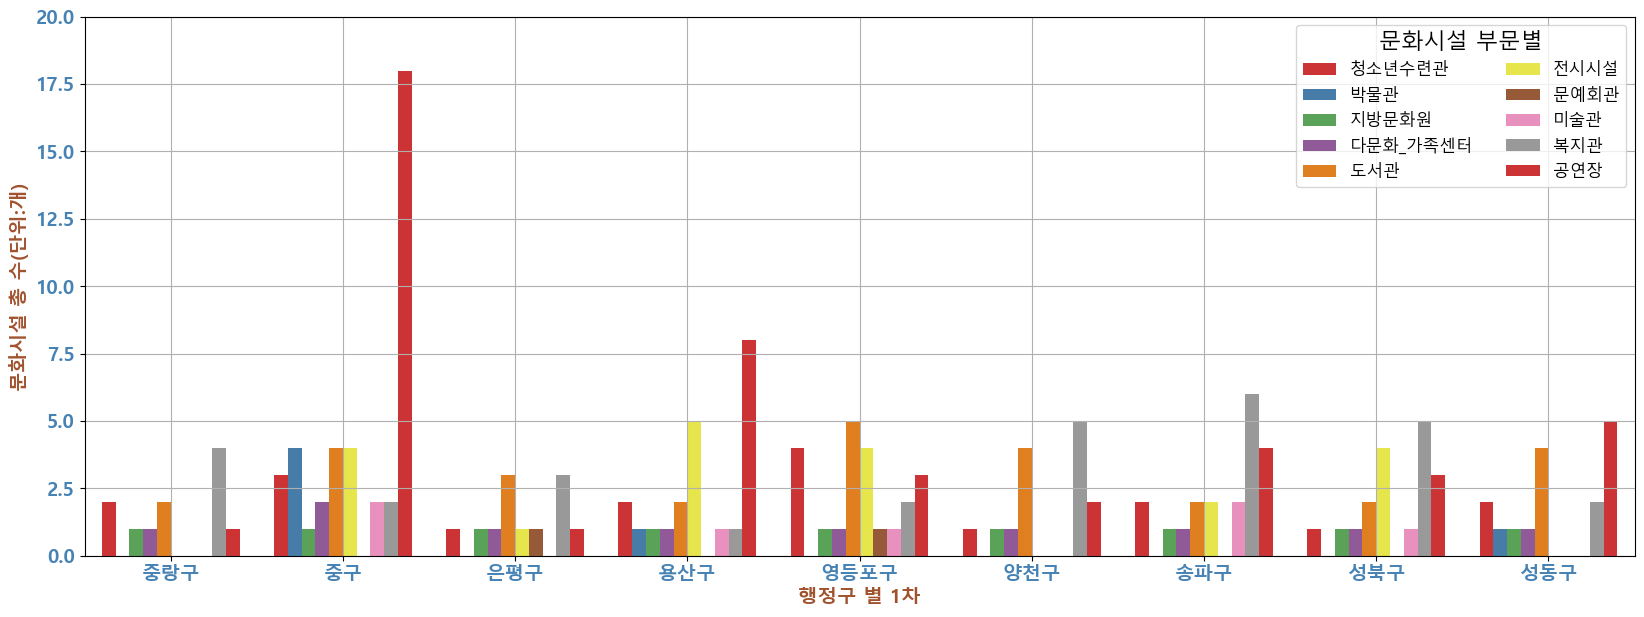

In [25]:
plt.figure(figsize=(20,7))
sb.barplot(data=df_sub1, x='지역', y='개수', hue='분류명', palette='Set1')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.ylim(0,20)
plt.xlabel('행정구 별 1차',fontsize=14,fontweight='bold',color='sienna')
plt.ylabel('문화시설 총 수(단위:개)',fontsize=14,fontweight='bold',color='sienna')
plt.grid()
plt.legend(title="문화시설 부문별",title_fontsize=16,ncol=2,loc='upper right',bbox_to_anchor=(1.0,1.0))
plt.show()
plt.close()

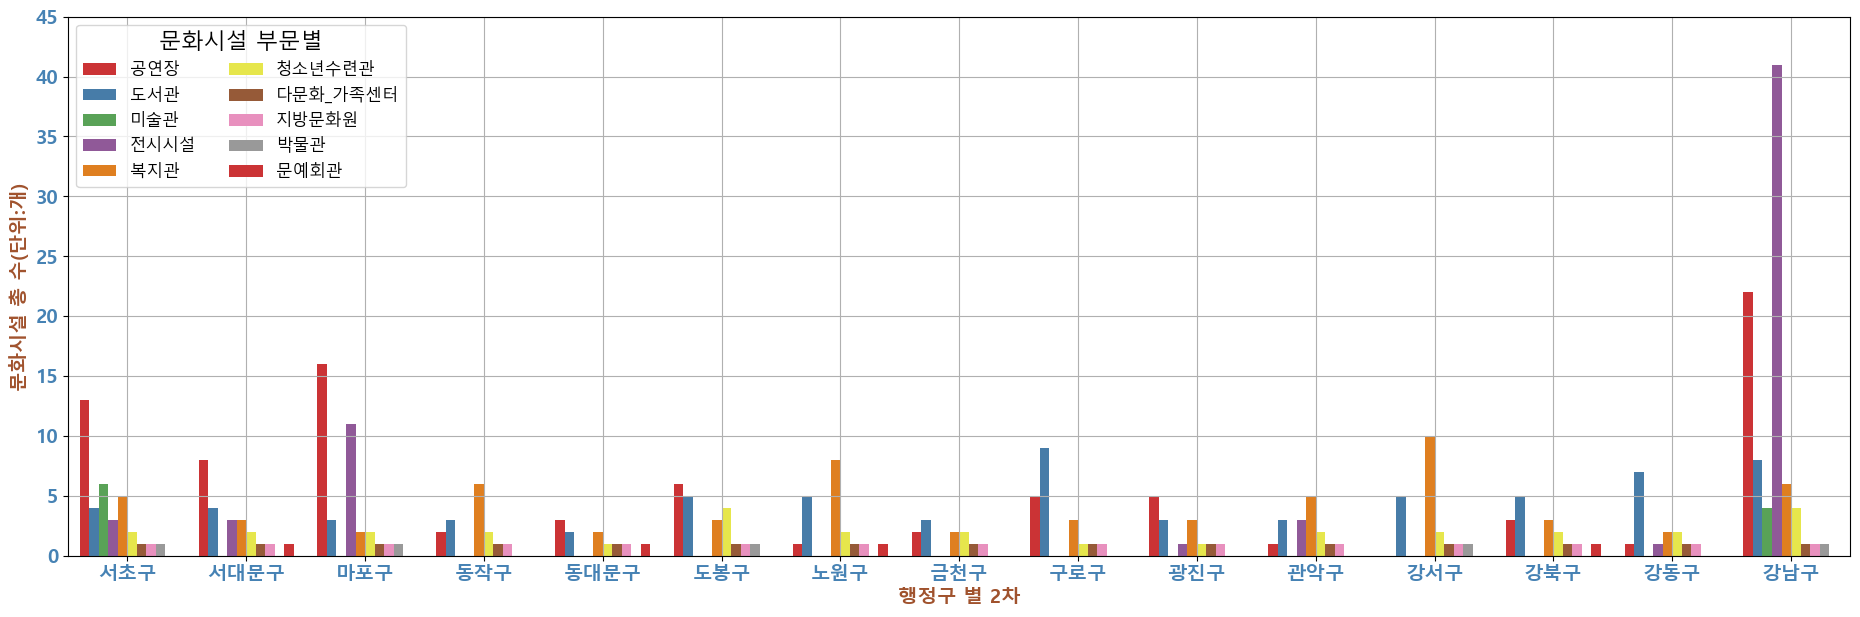

In [26]:
plt.figure(figsize=(23,7))
sb.barplot(data=df_sub2, x='지역', y='개수', hue='분류명', palette='Set1')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.ylim(0,45)
plt.xlabel('행정구 별 2차',fontsize=14,fontweight='bold',color='sienna')
plt.ylabel('문화시설 총 수(단위:개)',fontsize=14,fontweight='bold',color='sienna')
plt.grid()
plt.legend(title="문화시설 부문별",title_fontsize=16,ncol=2,loc='upper left')
plt.show()
plt.close()

종합 의견:
우선 서울시에서 시행하려는 보행일상권을 실행하려면 기본적으로 각 행정구마다 지금 표시해놓은 문화시설이 빠짐없이 고루 분포되어 있어야한다.(이거 말고도 취합안된 데이터 더 있을거임)

2장의 그래프를 보면 알겠지만 각 행정구마다 비어있는(시설 자체가 없는) 문화시설이 상당히 많은 것을 알 수 있다. 이 문제를 어떻게 해결하는지 서울시의 몫이라고 볼 수 있음

대안1:
분포가 몰려있는 행정구의 문화시설을 `이전`하는 방법

대안2:
시설이 없는 행정구에 신규 문화시설을 새로 짓는 것

어찌됬든 예산 소모는 클 것이다